# Imports y configuraciones iniciales

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bwb.distributions import DistributionDraw, DistributionDrawBuilder
from bwb.utils import plot_list_of_draws, plot_histogram_from_points

Importamos los datos utilizando el archivo npy que proporciona Google Cloud.

In [2]:
data = np.load(r"..\data\face.npy")
data.shape

(161666, 784)

Hacemos una lista de caritas, fijando un generador con la semilla 42 para tener resultados replicables.

In [3]:
rng = np.random.default_rng(42)
faces: list[DistributionDraw] = list()
n_faces = len(data)

# Builder con la semilla por default
dist_draw_builder = DistributionDrawBuilder(seed=rng)

for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces.append(dd_arr)

Observamos las distintas caritas que tiene el dataset.

In [4]:
plot_list_of_draws(faces)

Muestrear con respecto a una carita (la primera para simplificar) para obtener $D = \{x_i\}_{i=1}^{n}\subseteq\mathcal{X}^n$

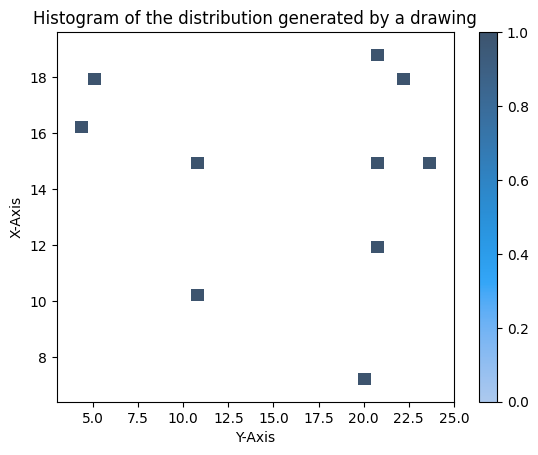

In [5]:
n = 10

first_face = DistributionDraw.fromarray(255 - data[0, :].reshape(28, 28),
                                        seed=42)

x = first_face.rvs(size=n)

plot_histogram_from_points(x, histplot_kwargs=dict(bins=28))
plt.show()

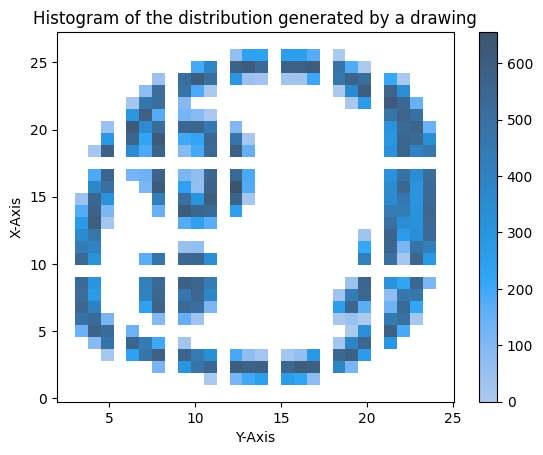

In [6]:
plot_histogram_from_points(first_face.rvs(size=100_000), histplot_kwargs=dict(bins=28))
plt.show()

Defino
\begin{equation}
\tilde\Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i)
\end{equation}

A través de la función `likelihood`

In [7]:
def likelihood(mu: DistributionDraw, data: list[tuple[int, int]]):
    evaluations = []
    for i in range(len(data)):
        evaluations.append(mu.matrix[data[i]])
    return np.prod(evaluations)

likelihood(mu=faces[0], data=x)

1.2568867068560359e-24

# Metropolis Algorithm

En esta sección se implementa el *Metropolis Algorithm*. Este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = (\text{degr}(\mu))^{-1} = \frac{1}{|\mathcal{M} - 1|}
\end{equation}
donde lo último es por la forma que posee el grafo escogido.

In [8]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(face, data=x) for face in faces])

# valid_faces = [face for i, face in enumerate(faces) if ]

probabilities = (likelihood_cache > 0).astype(float)
probabilities /= probabilities.sum()

CPU times: total: 16.3 s
Wall time: 17.3 s


In [9]:
%%time

N = 1_000  # 10_000
mu = []

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces, p=probabilities))
mu.append(faces[current_face])  # mu^(0)
visited_faces = [faces[current_face]]

# Paso 2.
for i in range(N):
    print("=" * 10)

    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    possible_faces = list(range(n_faces))
    possible_faces.remove(current_face)
    # Escoger una carita
    next_face = int(rng.choice(possible_faces))
    mu_star = faces[next_face]
    if next_face not in likelihood_cache: likelihood_cache[next_face] = likelihood(mu_star, data=x)

    # Paso c.
    # Luego calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (likelihood_cache[next_face])
                         / (likelihood_cache[current_face])
                         )

    print(f"{i = }")
    print(f"{likelihood_cache[current_face] = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face
        visited_faces.append(mu_star)

    else:
        mu.append(mu[i])


i = 0
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 1
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 2
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 3
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 4
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 5
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 6
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 7
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 8
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 9
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 10
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 11
likelihood_cache[current_face] = 9.801443105399236e-30
A_mu_i_mu_star = 0.0
i = 12
likelih

i = 87
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 88
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 89
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 90
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 91
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 92
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 93
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 94
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 95
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 96
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 97
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 98
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 

i = 184
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 185
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 186
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 187
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 188
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 189
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 190
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 191
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 192
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 193
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 194
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_star = 0.0
i = 195
likelihood_cache[current_face] = 5.299829361975265e-25
A_mu_i_mu_sta

i = 280
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 281
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 282
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 283
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 284
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 285
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 286
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 287
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 288
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 289
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 290
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_star = 0.0
i = 291
likelihood_cache[current_face] = 1.037987162302431e-24
A_mu_i_mu_sta

i = 370
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 371
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 372
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 373
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 374
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 375
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 376
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 377
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 378
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 379
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 380
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 381
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_sta

i = 460
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.059626625550310064
i = 461
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 462
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 463
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 464
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 465
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 466
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 467
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 468
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.06978492426285436
i = 469
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 470
likelihood_cache[current_face] = 5.202052269041276e-25
A_mu_i_mu_star = 0.0
i = 471
likelihood_cache[current_face] = 5.

i = 549
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.0
i = 550
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.0
i = 551
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.0
i = 552
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.0
i = 553
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.0
i = 554
likelihood_cache[current_face] = 5.949634594402927e-25
A_mu_i_mu_star = 0.7642310368713359
current_face = 89458 -> next_face = 121518
u = 0.3961665000592489
i = 555
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 556
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 557
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 558
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 559
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star =

i = 642
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 643
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 644
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 645
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 646
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 647
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 648
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 649
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 650
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 651
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 652
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 653
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_sta

i = 731
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 732
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 733
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 734
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 735
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 736
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 737
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 738
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 739
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 740
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 741
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 742
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_sta

i = 824
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 825
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 826
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 827
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 828
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 829
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 830
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 831
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 832
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 833
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 834
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 835
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_sta

i = 913
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 914
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 915
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 916
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 917
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 918
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 919
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 920
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 921
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 922
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 923
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_star = 0.0
i = 924
likelihood_cache[current_face] = 4.546895415086119e-25
A_mu_i_mu_sta

In [10]:
len(visited_faces)

9

Empecemos observando las distintas imágenes que generó

In [11]:
# Primera imagen generada
mu[0]

In [12]:
plot_list_of_draws(visited_faces)

In [13]:
# Última imagen generada
mu[-1]

# Gibbs Sampler

Ahora empecemos a generar la otra variación del algoritmo: *Gibbs Sampler*. Después de unos cálculos, este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = \frac{
\tilde \Lambda_n(\nu)
}{
\sum_{\tilde \nu \in \mathcal{M}} \tilde \Lambda_n(\tilde \nu) - \tilde \Lambda_n(\mu)
}
\end{equation}
con la función $\tilde\Lambda_n$ definida como antes.

Notemos que, la gran diferencia con el otro algoritmo es la forma de calcular la matriz $R$. Por este motivo se copiará y pegará el algoritmo anterior, modificando este valor.

In [14]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(nu_tilde, data=x) for nu_tilde in faces])

# Cálculo de la sumatoria, que es un valor genérico para todos
sum_lambdas_n = sum(likelihood_cache)
sum_lambdas_n

CPU times: total: 4.86 s
Wall time: 4.93 s


2.8442035766255675e-21

In [15]:
sum(likelihood_cache > 0)

3393

In [16]:
%%time

N = 1_000
mu = []
possible_faces = list(range(n_faces))

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces))
mu.append(faces[current_face])  # mu^(0)
probabilities = dict()

# Paso 2.
for i in range(N):
    print("=" * 10)
    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    # Calcular las probabilidades
    if current_face not in probabilities:
        print(f"Calculando las probabilidades de transición de la carita {current_face = }")
        probabilities[current_face] = np.array([
            likelihood_cache[face_i]
            / (sum_lambdas_n - likelihood_cache[current_face]) for face_i in possible_faces
        ])
        probabilities[current_face][current_face] = 0.
    # Escoger una carita
    next_face = int(rng.choice(possible_faces, p=probabilities[current_face]))
    mu_star = faces[next_face]

    # Paso c.
    # calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (sum_lambdas_n - likelihood_cache[current_face])
                         / (sum_lambdas_n - likelihood_cache[next_face])
                         )

    print(f"{i = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face

    else:
        mu.append(mu[i])


Calculando las probabilidades de transición de la carita current_face = 150338
i = 0
A_mu_i_mu_star = 1.0
current_face = 150338 -> next_face = 60468
u = 0.3709123215416692
Calculando las probabilidades de transición de la carita current_face = 60468
i = 1
A_mu_i_mu_star = 1.0
current_face = 60468 -> next_face = 74976
u = 0.8121229611870592
Calculando las probabilidades de transición de la carita current_face = 74976
i = 2
A_mu_i_mu_star = 0.961710841699415
current_face = 74976 -> next_face = 64145
u = 0.736573093115733
Calculando las probabilidades de transición de la carita current_face = 64145
i = 3
A_mu_i_mu_star = 1.0
current_face = 64145 -> next_face = 115338
u = 0.21549514181270046
Calculando las probabilidades de transición de la carita current_face = 115338
i = 4
A_mu_i_mu_star = 0.981686164855451
current_face = 115338 -> next_face = 26413
u = 0.13115516918470993
Calculando las probabilidades de transición de la carita current_face = 26413
i = 5
A_mu_i_mu_star = 1.0
current_fac

i = 48
A_mu_i_mu_star = 1.0
current_face = 24260 -> next_face = 43674
u = 0.8119882015105448
Calculando las probabilidades de transición de la carita current_face = 43674
i = 49
A_mu_i_mu_star = 0.9975243896033836
current_face = 43674 -> next_face = 20388
u = 0.9132851837019758
Calculando las probabilidades de transición de la carita current_face = 20388
i = 50
A_mu_i_mu_star = 1.0
current_face = 20388 -> next_face = 130654
u = 0.6777086144544695
Calculando las probabilidades de transición de la carita current_face = 130654
i = 51
A_mu_i_mu_star = 1.0
current_face = 130654 -> next_face = 44642
u = 0.235256388415645
i = 52
A_mu_i_mu_star = 0.9727663328457447
current_face = 44642 -> next_face = 41648
u = 0.9645188861392017
Calculando las probabilidades de transición de la carita current_face = 41648
i = 53
A_mu_i_mu_star = 1.0
current_face = 41648 -> next_face = 60784
u = 0.4299570499000478
Calculando las probabilidades de transición de la carita current_face = 60784
i = 54
A_mu_i_mu_sta

i = 100
A_mu_i_mu_star = 0.980818394918494
current_face = 161623 -> next_face = 97369
u = 0.3520506742392382
Calculando las probabilidades de transición de la carita current_face = 97369
i = 101
A_mu_i_mu_star = 1.0
current_face = 97369 -> next_face = 161623
u = 0.47393273763807797
i = 102
A_mu_i_mu_star = 0.9831529272238361
current_face = 161623 -> next_face = 53018
u = 0.09380782400772492
i = 103
A_mu_i_mu_star = 1.0
current_face = 53018 -> next_face = 44642
u = 0.8755390445272362
i = 104
A_mu_i_mu_star = 0.9739751314152145
current_face = 44642 -> next_face = 52441
u = 0.7877928506388727
Calculando las probabilidades de transición de la carita current_face = 52441
i = 105
A_mu_i_mu_star = 0.9999158604460123
current_face = 52441 -> next_face = 136210
u = 0.9799785398901583
Calculando las probabilidades de transición de la carita current_face = 136210
i = 106
A_mu_i_mu_star = 1.0
current_face = 136210 -> next_face = 120884
u = 0.30132035766261533
Calculando las probabilidades de transi

i = 153
A_mu_i_mu_star = 1.0
current_face = 64620 -> next_face = 7530
u = 0.4090351320457297
Calculando las probabilidades de transición de la carita current_face = 7530
i = 154
A_mu_i_mu_star = 0.9925493577641809
current_face = 7530 -> next_face = 65461
u = 0.2223679278968107
Calculando las probabilidades de transición de la carita current_face = 65461
i = 155
A_mu_i_mu_star = 1.0
current_face = 65461 -> next_face = 36621
u = 0.7429063098580823
Calculando las probabilidades de transición de la carita current_face = 36621
i = 156
A_mu_i_mu_star = 1.0
current_face = 36621 -> next_face = 78135
u = 0.8297499101249115
Calculando las probabilidades de transición de la carita current_face = 78135
i = 157
A_mu_i_mu_star = 0.9845928245830234
current_face = 78135 -> next_face = 68424
u = 0.7604216851846175
Calculando las probabilidades de transición de la carita current_face = 68424
i = 158
A_mu_i_mu_star = 0.9996895233460902
current_face = 68424 -> next_face = 95830
u = 0.49919422542222336
Cal

i = 208
A_mu_i_mu_star = 0.9995839776837392
current_face = 111488 -> next_face = 149667
u = 0.5994268085799352
Calculando las probabilidades de transición de la carita current_face = 149667
i = 209
A_mu_i_mu_star = 1.0
current_face = 149667 -> next_face = 44894
u = 0.49406360366177704
Calculando las probabilidades de transición de la carita current_face = 44894
i = 210
A_mu_i_mu_star = 1.0
current_face = 44894 -> next_face = 51623
u = 0.4772329099757965
i = 211
A_mu_i_mu_star = 0.9743011013325206
current_face = 51623 -> next_face = 1719
u = 0.2244158926746863
i = 212
A_mu_i_mu_star = 0.9933969651777267
current_face = 1719 -> next_face = 110720
u = 0.3522124935651242
i = 213
A_mu_i_mu_star = 0.9862996960853191
current_face = 110720 -> next_face = 60784
u = 0.01843780287519381
i = 214
A_mu_i_mu_star = 1.0
current_face = 60784 -> next_face = 93601
u = 0.6440094014498684
i = 215
A_mu_i_mu_star = 0.992811634279324
current_face = 93601 -> next_face = 129757
u = 0.7766484358887159
i = 216
A_m

i = 274
A_mu_i_mu_star = 1.0
current_face = 49020 -> next_face = 575
u = 0.9876474477564617
i = 275
A_mu_i_mu_star = 0.9952454552879685
current_face = 575 -> next_face = 132726
u = 0.45250793152438407
i = 276
A_mu_i_mu_star = 0.9766601797831554
current_face = 132726 -> next_face = 69290
u = 0.32390126271928843
i = 277
A_mu_i_mu_star = 0.9985358068955198
current_face = 69290 -> next_face = 71521
u = 0.97804574578798
Calculando las probabilidades de transición de la carita current_face = 71521
i = 278
A_mu_i_mu_star = 1.0
current_face = 71521 -> next_face = 1719
u = 0.13092131214649905
i = 279
A_mu_i_mu_star = 1.0
current_face = 1719 -> next_face = 44642
u = 0.9454165724399485
i = 280
A_mu_i_mu_star = 0.9807596198169225
current_face = 44642 -> next_face = 7901
u = 0.5040639065645509
i = 281
A_mu_i_mu_star = 1.0
current_face = 7901 -> next_face = 144294
u = 0.42365512055060506
i = 282
A_mu_i_mu_star = 0.9837983823876417
current_face = 144294 -> next_face = 156154
u = 0.5024129936309384
Ca

i = 336
A_mu_i_mu_star = 1.0
current_face = 23229 -> next_face = 82423
u = 0.3519299430229661
i = 337
A_mu_i_mu_star = 1.0
current_face = 82423 -> next_face = 132284
u = 0.41340824438985857
i = 338
A_mu_i_mu_star = 0.9867181857117903
current_face = 132284 -> next_face = 154913
u = 0.25672176153516624
i = 339
A_mu_i_mu_star = 1.0
current_face = 154913 -> next_face = 154261
u = 0.7847220208513513
Calculando las probabilidades de transición de la carita current_face = 154261
i = 340
A_mu_i_mu_star = 0.9977186718750042
current_face = 154261 -> next_face = 21064
u = 0.8381365548303041
i = 341
A_mu_i_mu_star = 1.0
current_face = 21064 -> next_face = 24221
u = 0.5264600906350138
Calculando las probabilidades de transición de la carita current_face = 24221
i = 342
A_mu_i_mu_star = 0.9974719644367878
current_face = 24221 -> next_face = 87589
u = 0.8182273526272573
Calculando las probabilidades de transición de la carita current_face = 87589
i = 343
A_mu_i_mu_star = 1.0
current_face = 87589 -> n

i = 399
A_mu_i_mu_star = 1.0
current_face = 114124 -> next_face = 115704
u = 0.9488737571491254
Calculando las probabilidades de transición de la carita current_face = 115704
i = 400
A_mu_i_mu_star = 1.0
current_face = 115704 -> next_face = 74976
u = 0.4716401906243787
i = 401
A_mu_i_mu_star = 0.9637718913003176
current_face = 74976 -> next_face = 46686
u = 0.43613642264910535
i = 402
A_mu_i_mu_star = 0.9975386590354142
current_face = 46686 -> next_face = 60869
u = 0.5217142141858402
i = 403
A_mu_i_mu_star = 1.0
current_face = 60869 -> next_face = 138390
u = 0.5981678800407747
Calculando las probabilidades de transición de la carita current_face = 138390
i = 404
A_mu_i_mu_star = 1.0
current_face = 138390 -> next_face = 7455
u = 0.9950094173238103
Calculando las probabilidades de transición de la carita current_face = 7455
i = 405
A_mu_i_mu_star = 1.0
current_face = 7455 -> next_face = 24318
u = 0.3846834726613414
i = 406
A_mu_i_mu_star = 0.9897201465000016
current_face = 24318 -> next_

i = 466
A_mu_i_mu_star = 1.0
current_face = 47318 -> next_face = 151201
u = 0.6972736618299291
i = 467
A_mu_i_mu_star = 1.0
current_face = 151201 -> next_face = 103549
u = 0.5875217805288743
Calculando las probabilidades de transición de la carita current_face = 103549
i = 468
A_mu_i_mu_star = 0.9898546198150882
current_face = 103549 -> next_face = 116311
u = 0.4371280421998007
Calculando las probabilidades de transición de la carita current_face = 116311
i = 469
A_mu_i_mu_star = 1.0
current_face = 116311 -> next_face = 23793
u = 0.9976673923386359
i = 470
A_mu_i_mu_star = 1.0
current_face = 23793 -> next_face = 78135
u = 0.2024052795037623
i = 471
A_mu_i_mu_star = 0.9847889060997617
current_face = 78135 -> next_face = 84812
u = 0.48137539726165823
i = 472
A_mu_i_mu_star = 1.0
current_face = 84812 -> next_face = 53018
u = 0.04907404772427304
i = 473
A_mu_i_mu_star = 0.9989051009875061
current_face = 53018 -> next_face = 87589
u = 0.5829782620655608
i = 474
A_mu_i_mu_star = 1.0
current_

i = 526
A_mu_i_mu_star = 0.9994850436404313
current_face = 147924 -> next_face = 108369
u = 0.2852210854938674
i = 527
A_mu_i_mu_star = 1.0
current_face = 108369 -> next_face = 43248
u = 0.025040203005183614
Calculando las probabilidades de transición de la carita current_face = 43248
i = 528
A_mu_i_mu_star = 0.9993979351676974
current_face = 43248 -> next_face = 786
u = 0.4637197279965928
Calculando las probabilidades de transición de la carita current_face = 786
i = 529
A_mu_i_mu_star = 1.0
current_face = 786 -> next_face = 105628
u = 0.6176694605536389
i = 530
A_mu_i_mu_star = 1.0
current_face = 105628 -> next_face = 74976
u = 0.7467317148380467
i = 531
A_mu_i_mu_star = 1.0
current_face = 74976 -> next_face = 51623
u = 0.6039446649786266
i = 532
A_mu_i_mu_star = 0.9594857902202596
current_face = 51623 -> next_face = 7901
u = 0.04125303250656254
i = 533
A_mu_i_mu_star = 1.0
current_face = 7901 -> next_face = 161623
u = 0.6549959242014641
i = 534
A_mu_i_mu_star = 0.996129326016079
cur

i = 595
A_mu_i_mu_star = 0.9707005931038827
current_face = 51623 -> next_face = 161623
u = 0.8757384859632077
i = 596
A_mu_i_mu_star = 0.9912466577000679
current_face = 161623 -> next_face = 23793
u = 0.8748508488051633
i = 597
A_mu_i_mu_star = 0.9901661223812859
current_face = 23793 -> next_face = 786
u = 0.819658219535163
i = 598
A_mu_i_mu_star = 1.0
current_face = 786 -> next_face = 132947
u = 0.39330188369930785
i = 599
A_mu_i_mu_star = 0.9912599326539742
current_face = 132947 -> next_face = 76888
u = 0.6887522127599198
i = 600
A_mu_i_mu_star = 0.9983489398686763
current_face = 76888 -> next_face = 129757
u = 0.3878640250826205
i = 601
A_mu_i_mu_star = 0.9990052648876655
current_face = 129757 -> next_face = 69539
u = 0.7095584039482209
Calculando las probabilidades de transición de la carita current_face = 69539
i = 602
A_mu_i_mu_star = 1.0
current_face = 69539 -> next_face = 34575
u = 0.8924843372096598
i = 603
A_mu_i_mu_star = 1.0
current_face = 34575 -> next_face = 101496
u = 0.

i = 660
A_mu_i_mu_star = 1.0
current_face = 104058 -> next_face = 151201
u = 0.05405431161859919
i = 661
A_mu_i_mu_star = 1.0
current_face = 151201 -> next_face = 115338
u = 0.9807574679083522
i = 662
A_mu_i_mu_star = 0.9837542586798873
current_face = 115338 -> next_face = 30825
u = 0.46521247156357315
i = 663
A_mu_i_mu_star = 1.0
current_face = 30825 -> next_face = 115338
u = 0.8125163402479647
i = 664
A_mu_i_mu_star = 0.9809153768542439
current_face = 115338 -> next_face = 64569
u = 0.22195403956094906
Calculando las probabilidades de transición de la carita current_face = 64569
i = 665
A_mu_i_mu_star = 1.0
current_face = 64569 -> next_face = 132284
u = 0.46279893781678505
i = 666
A_mu_i_mu_star = 0.9885780663231571
current_face = 132284 -> next_face = 100079
u = 0.6838446843340765
i = 667
A_mu_i_mu_star = 0.9953242951010527
current_face = 100079 -> next_face = 44544
u = 0.6498274225632784
Calculando las probabilidades de transición de la carita current_face = 44544
i = 668
A_mu_i_mu

i = 723
A_mu_i_mu_star = 1.0
current_face = 121555 -> next_face = 133294
u = 0.9576934080154231
i = 724
A_mu_i_mu_star = 1.0
current_face = 133294 -> next_face = 120959
u = 0.15357786694775655
i = 725
A_mu_i_mu_star = 0.984192050701258
current_face = 120959 -> next_face = 143759
u = 0.14794691330471144
i = 726
A_mu_i_mu_star = 0.997272330955489
current_face = 143759 -> next_face = 49606
u = 0.5178785756685784
i = 727
A_mu_i_mu_star = 1.0
current_face = 49606 -> next_face = 575
u = 0.1570254973341928
i = 728
A_mu_i_mu_star = 0.9731877607469609
current_face = 575 -> next_face = 143759
u = 0.24794699166088474
i = 729
A_mu_i_mu_star = 0.9994435530569123
current_face = 143759 -> next_face = 154913
u = 0.7972621922722275
i = 730
A_mu_i_mu_star = 0.9988895179557271
current_face = 154913 -> next_face = 89063
u = 0.10076152112137304
Calculando las probabilidades de transición de la carita current_face = 89063
i = 731
A_mu_i_mu_star = 1.0
current_face = 89063 -> next_face = 78135
u = 0.257150474

i = 787
A_mu_i_mu_star = 1.0
current_face = 141782 -> next_face = 93601
u = 0.33748970638443865
i = 788
A_mu_i_mu_star = 0.9954960239942303
current_face = 93601 -> next_face = 43674
u = 0.6088078092055942
i = 789
A_mu_i_mu_star = 0.9966051201333044
current_face = 43674 -> next_face = 14329
u = 0.2219522514470672
Calculando las probabilidades de transición de la carita current_face = 14329
i = 790
A_mu_i_mu_star = 1.0
current_face = 14329 -> next_face = 120959
u = 0.6593141959164528
i = 791
A_mu_i_mu_star = 0.9824704882672565
current_face = 120959 -> next_face = 46391
u = 0.7609529795170038
i = 792
A_mu_i_mu_star = 0.9996643983748617
current_face = 46391 -> next_face = 66396
u = 0.20525985046520223
i = 793
A_mu_i_mu_star = 1.0
current_face = 66396 -> next_face = 144294
u = 0.5468134602405106
i = 794
A_mu_i_mu_star = 0.9849137800408377
current_face = 144294 -> next_face = 139402
u = 0.8748231542740541
Calculando las probabilidades de transición de la carita current_face = 139402
i = 795


i = 859
A_mu_i_mu_star = 0.967206414763724
current_face = 51623 -> next_face = 132284
u = 0.2742455352181029
i = 860
A_mu_i_mu_star = 0.9886277087752386
current_face = 132284 -> next_face = 106311
u = 0.7599263975940903
i = 861
A_mu_i_mu_star = 0.9956284116277884
current_face = 106311 -> next_face = 127216
u = 0.1390050785122653
Calculando las probabilidades de transición de la carita current_face = 127216
i = 862
A_mu_i_mu_star = 1.0
current_face = 127216 -> next_face = 26413
u = 0.6771759616633237
i = 863
A_mu_i_mu_star = 0.9993861767651024
current_face = 26413 -> next_face = 74726
u = 0.6480939302815164
Calculando las probabilidades de transición de la carita current_face = 74726
i = 864
A_mu_i_mu_star = 1.0
current_face = 74726 -> next_face = 13774
u = 0.43935006185622505
Calculando las probabilidades de transición de la carita current_face = 13774
i = 865
A_mu_i_mu_star = 1.0
current_face = 13774 -> next_face = 9303
u = 0.5183042758451654
Calculando las probabilidades de transició

i = 929
A_mu_i_mu_star = 0.9932884518100763
current_face = 105628 -> next_face = 50577
u = 0.3180641471086795
Calculando las probabilidades de transición de la carita current_face = 50577
i = 930
A_mu_i_mu_star = 0.9977724708399205
current_face = 50577 -> next_face = 89458
u = 0.5851478216413033
Calculando las probabilidades de transición de la carita current_face = 89458
i = 931
A_mu_i_mu_star = 1.0
current_face = 89458 -> next_face = 48837
u = 0.3146999136371331
i = 932
A_mu_i_mu_star = 0.9901496451009986
current_face = 48837 -> next_face = 101577
u = 0.6940450131861471
Calculando las probabilidades de transición de la carita current_face = 101577
i = 933
A_mu_i_mu_star = 0.9997887283846758
current_face = 101577 -> next_face = 63046
u = 0.1350508046797747
i = 934
A_mu_i_mu_star = 1.0
current_face = 63046 -> next_face = 1719
u = 0.8927060787105903
i = 935
A_mu_i_mu_star = 0.9914739185498117
current_face = 1719 -> next_face = 24318
u = 0.8551639464842137
i = 936
A_mu_i_mu_star = 0.9854

i = 993
A_mu_i_mu_star = 1.0
current_face = 114152 -> next_face = 74976
u = 0.20864533255599838
i = 994
A_mu_i_mu_star = 0.990950049705086
current_face = 74976 -> next_face = 575
u = 0.5882685546050872
i = 995
A_mu_i_mu_star = 0.9702979356247953
current_face = 575 -> next_face = 96772
u = 0.855962508813682
Calculando las probabilidades de transición de la carita current_face = 96772
i = 996
A_mu_i_mu_star = 1.0
current_face = 96772 -> next_face = 131242
u = 0.12913633169820327
i = 997
A_mu_i_mu_star = 1.0
current_face = 131242 -> next_face = 115855
u = 0.7170569664405446
i = 998
A_mu_i_mu_star = 1.0
current_face = 115855 -> next_face = 132726
u = 0.3920424618618562
i = 999
A_mu_i_mu_star = 0.9794948172609748
current_face = 132726 -> next_face = 79186
u = 0.41402758213236224
CPU times: total: 1min 10s
Wall time: 1min 20s


In [17]:
not_none_keys = probabilities.keys()

len(not_none_keys)

312

Empecemos observando las distintas imágenes que generó

In [18]:
# Primera imagen generada
mu[0]

In [19]:
plot_list_of_draws([faces[k] for k in not_none_keys])

In [20]:
# Última imagen generada
mu[-1]

# Ideas y Conclusiones

Ideas para continuar:
* Dejar guardadas de alguna forma las simulaciones realizadas
* Intentar hacer el mismo experimento, pero haciendo que el soporte de las funciones sea distinto de 0 (es decir, que todos tengan el mismo soporte), para que la función $\tilde \Lambda_n$ no se anule, y no posea una probabilidad de aceptación nula

El experimento fue realizado con 161.666 caritas, en donde se muestreó a partir de la primera carita 3 puntos, es decir $D=\{x_i\}_{i=1}^{3} \sim m_0$ i.i.d.

A pesar de los pocos datos que se utilizó para calcular la posterior $\Pi_n$, aún se toma demasiado "saltos" (igual uno esperaría que se pueda probar con $n=100$ datos, por ejemplo). Esto se puede deber por la forma que posee la verosimilitud:
\begin{equation}
\bold{\Pi}_n(x_1,\ldots,x_n | m) = \tilde \Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i).
\end{equation}

Cómo se están evaluando los puntos de los datos en la función de distribución del modelo $m$, entonces, si es que existe un punto $\tilde x \in D$ tal que $f_m(\tilde x) = 0$, hará que el valor de la verosimilitud sea idénticamente 0. De forma que, sin importar los otros valores, si $D \not\subseteq \text{sop}(m)$, entonces el valor asignado al modelo $m$ será de 0.

Es esta la razón por la que el algoritmo MCMC termina saltándose varias distribuciones. Una forma de arreglar esto, es el de asignar algún valor distinto de nulo, para darle mayor oportunidad a saltar a esas distribuciones. Esto es lo que se hará en el notebook siguiente.

Adicionalmente, se observa que el algoritmo de *Gibbs sampler* se demora 30 segundos más que el de *Metropolis algorithm*.